<img style="float: left;" src="./images/logo.png" width="400"/><img style="float: right;" src="./images/icons.png" width="400"/>

original notebook available at [https://github.com/cvitolo/geff_notebooks](https://github.com/cvitolo/geff_notebooks)

# Global ECMWF Fire Forecasting

The European Centre for Medium-range Weather Forecasts ([ECMWF](https://www.ecmwf.int/)) produces daily fire danger forecasts and reanalysis products for the Copernicus Emergency Management Services ([CEMS](https://emergency.copernicus.eu/)). Activities are funded funded through a third-party agreement with the European Commission’s Joint Research Centre (JRC).

The modelling system that generates the fire data products is called Global ECMWF Fire Forecast ([GEFF](\href{https://git.ecmwf.int//projects/CEMSF/repos/geff/browse)) and it is based on the Canadian Fire Weather index as well as the US and Australian fire danger systems.

# Data overview

Fire danger data products:

- **GEFF-RT** provides the following *real-time* fire danger forecasts using weather forcings from the latest model cycle of the ECMWF’s Integrated Forecasting System (IFS):
    - *rt_hr*: high-resolution deterministic (~9 Km, with 10 days lead time) and 
    - *rt_en*: lower-resolution probabilistic (~18Km, with 15 days lead time)
- **GEFF-RE** provides historical records of global fire danger conditions (*reanalysis*) from 1980 to the present day. This dataset is updated as soon as new ERA-5 data becomes available (~2 months behind real-time) and it is made of four products:
    - *e5_hr*: deterministic model outputs (~28 Km),
    - *e5_en*: probabilistic model outputs (made of 10 ensemble members, ~56 Km),
    - ensemble mean and
    - ensemble spread.
    
All of GEFF data products are under the Copernicus license, which provides users with free, full and open access to environmental data. Please note, the terms `GEFF data`, `EFFIS data` and `GWIS data` are considered synonyms and will be used interchangibly hereafter.

## Data availability

- **geff-rt** data can be requested through an online [form](https://effis.jrc.ec.europa.eu/applications/data-request-form/) and viewed using the following platforms: the European Forest Fire Information System ([EFFIS](https://effis.jrc.ec.europa.eu/static/effis_current_situation/public/index.html)) and the Global Wildfire Information System ([GWIS](https://gwis.jrc.ec.europa.eu/static/gwis_current_situation/public/index.html))
- **geff-re** data are available through the Copernicus Climate Data Store ([CDS](https://cds.climate.copernicus.eu)).

## Event of interest: Portugal fires, 25-27 July 2020

For the purpose of this tutorial, all relevant global data is in the directory `./eodata/geff/global/`. Data for tutorial 01 and 02 are in `./eodata/geff/202007_Portugal/`. 

#### Get the sample data 
The global data are available via Zenodo in the original notebook. Here we only upload data already croped on Portugal.
There are availble here: 



### Background
A devastating wildfire raged in the municipality of Oleiros and two neighboring municipalities over the period 25-27 July 2020.
(Source: https://www.dw.com/en/portugal-wildfires-state-of-alert/a-54329910).

### Active fires
Most of the active fires detected by the MODIS instruments was in the centre and north of Portugal.

In [3]:
# First of all, we need to import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

# Enable inline displaying of plots
%matplotlib inline

In [6]:
# Where did the fire actually occur?
bbox = [350.18, 353.81, 36.78, 42.15]
lon_slice = slice(350.18, 353.81)
lat_slice = slice(42.15, 36.78)

# Let's download Fire Radiative Power from CAMS GFAS: https://apps.ecmwf.int/datasets/data/cams-gfas/

# Open fire radiative power dataset
ds = xr.open_dataset("./eodata/geff/202007_Portugal/frp/CAMS_portugal_daily_2020-07-01_2020-07-31.nc")
# Data have global coverage and are bundled in monthly datacubes, we will need to slice in time and space
ds = ds.loc[dict(time = slice('2020-07-25', '2020-07-28'), longitude = lon_slice, latitude = lat_slice)]
frpfire = ds.frpfire
frpfire.values[frpfire.values <= 0] = np.nan

/tmp/ipykernel_58070/2192423368.py:9: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


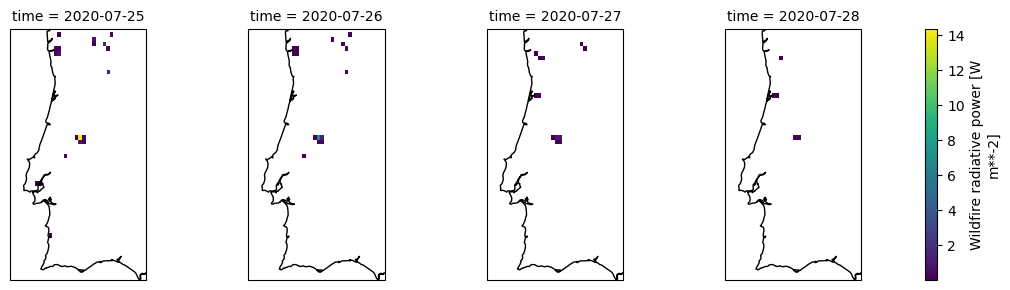

In [7]:
# This is the map projection we want to plot *onto*
map_proj = ccrs.LambertConformal(central_longitude = 352, central_latitude = 39.5)

p = frpfire.plot(transform=ccrs.PlateCarree(),                         # the data's projection
                 col = 'time', col_wrap = 4,                           # multiplot settings
                 subplot_kws = {'projection': map_proj})               # the plot's projection

# We have to set the map's options on all axes
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent(bbox)

# Explore the data

In this section we show how to load GEFF datasets and explore the content. We will touch briefly on the different spatial resolutions of each datasets and related implications (e.g. different land-sea mask -> different spatial coverage).

### geff-rt: fire danger forecasts

The GEFF model uses weather forcings from the ECMWF’s Integrated Forecasting System (IFS) to generate fire danger forecasts. Based on the date of a particular event (e.g. 25-27 July 2020) the IFS model cycle used was 47r1.

#### HRES forecast

This dataset provides real-time high-resolution deterministic (~9 Km) fire danger forecasts up to 10 days ahead. Let us explore the content of the sample file.

In [23]:
# Open the dataset
ds_rt_hr = xr.open_dataset("./eodata/geff/202007_Portugal/rt_hr/ECMWF_FWI_20200725_1200_hr.nc")
ds_rt_hr

<xarray.Dataset>
Dimensions:      (time: 10, lon: 51, lat: 77)
Coordinates:
  * time         (time) datetime64[ns] 2020-07-25 2020-07-26 ... 2020-08-03
  * lon          (lon) float32 350.2 350.3 350.4 350.4 ... 353.6 353.7 353.7
  * lat          (lat) float32 42.14 42.07 42.0 41.93 ... 37.01 36.94 36.87 36.8
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 2.1.1 (https://mpimet.m...
    Conventions:       CF-1.6
    Reference date:    20200725
    ECMWF fire model:  3.1
    License:           Copernicus
    version:           3.1
    history:           Thu Oct 26 22:31:11 2023: cdo sellonlatbox,350.18,353....
    NCO:               netCDF Operators version 4.9.2 (Homepage = http://nco....
    CDO:               Climate Data Operators version 2.1.1 (https://mpimet.m...

This dataset has three dimensions: latitude, longitude and time. In the lat/long plane data are distributed on a regular grid (2560 x 5120), while the time dimension is made of 10 levels (each corresponds to a daily forecast estimate). Each cell of this datacube contains only 8 variables: fwi, ffmc, dmc, dc, isi, bui, dsr, danger_risk. 

To plot and run basic operations, it is convenient to convert the dataset to a dataarray by extracting 1 variable, e.g. fwi. 

Remember: 
- DataArray = single multi-dimensional variable and its coordinates
- Dataset = holds multiple variables that potentially share the same coordinates.

In [24]:
# Convert ds to a dataarray extracting only the variable fwi
da_rt_hr = ds_rt_hr.fwi
da_rt_hr

<xarray.DataArray 'fwi' (time: 10, lat: 77, lon: 51)>
[39270 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-07-25 2020-07-26 ... 2020-08-03
  * lon      (lon) float32 350.2 350.3 350.4 350.4 ... 353.5 353.6 353.7 353.7
  * lat      (lat) float32 42.14 42.07 42.0 41.93 ... 37.01 36.94 36.87 36.8
Attributes:
    units:             -
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  1280
    title:             Fire Weather Index

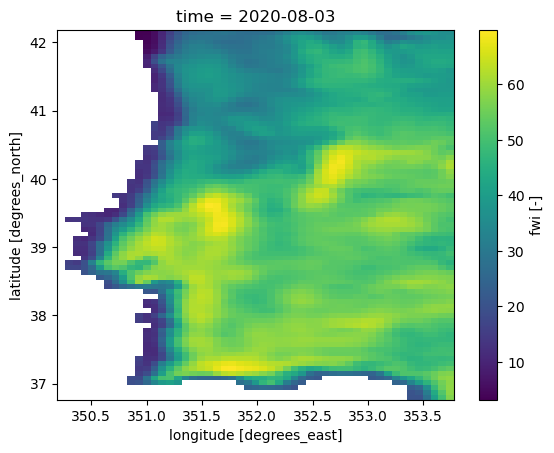

In [25]:
# Plot the first day
da_rt_hr[-1].plot() 

The data above was already cropped, the code below kept the function to crop it over portugal for example
The code below also plot the map of FWI with the right aspect ratio

In [26]:
# Crop over area of interest, note lat = slice(top, bottom), lon = slice(left, right)!
# Use this service to get coordinates: https://boundingbox.klokantech.com/
fwi_rt_hr = da_rt_hr.loc[dict(lat = lat_slice, lon = lon_slice)]

/tmp/ipykernel_58070/4232473784.py:7: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


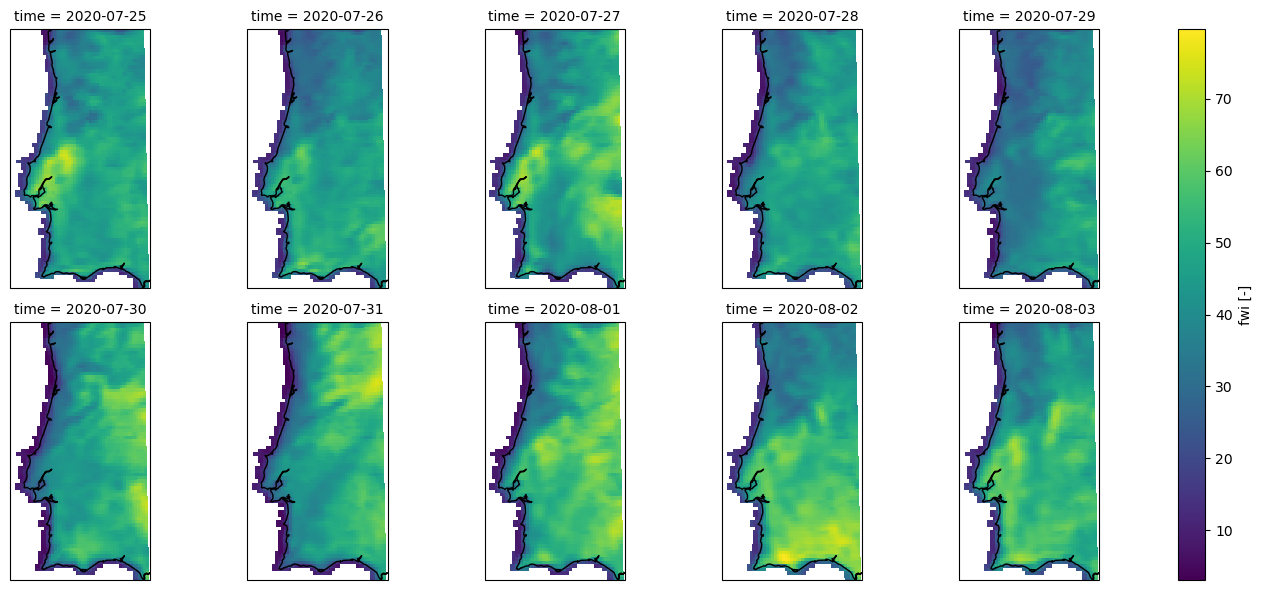

In [27]:
map_proj = ccrs.LambertConformal(central_longitude = 352, central_latitude = 39.5)

# Plot RT-HR
p = fwi_rt_hr.plot(transform=ccrs.PlateCarree(),
                   col = 'time', col_wrap = 5,
                   subplot_kws = {'projection': map_proj})
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent(bbox)

## geff-re: ERA5 based reanalysis of the Fire Weather Index

This dataset provides historical records of global fire danger conditions from 1980 to the present day and it is made of two main types of products: (i) deterministic model outputs (HRES reanalysis), (ii) probabilistic model outputs (made of 10 ensemble members, ENS reanalysis). It is updated as soon as new ERA5 data becomes available (~2 months behind real-time). 

A single reanalysis layer is often used as proxy for observations (e.g. for validating the forecasts). Stacking together consecutive reanalysis estimates, allows to compute temporal trends and other long term statistics.

#### HRES reanalysis

Let's repeat the same operations shown above, this time the dataset has only 1 temporal layer.
The regular grid of the global data is smaller (640 x 1280) compared to the HRES forecasts.

In [57]:
# Open the dataset
ds_e5_hr = xr.open_dataset("./eodata/geff/202007_Portugal/e5_hr/ECMWF_FWI_20200725_1200_hr_fwi.nc")

/tmp/ipykernel_58070/689423840.py:11: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


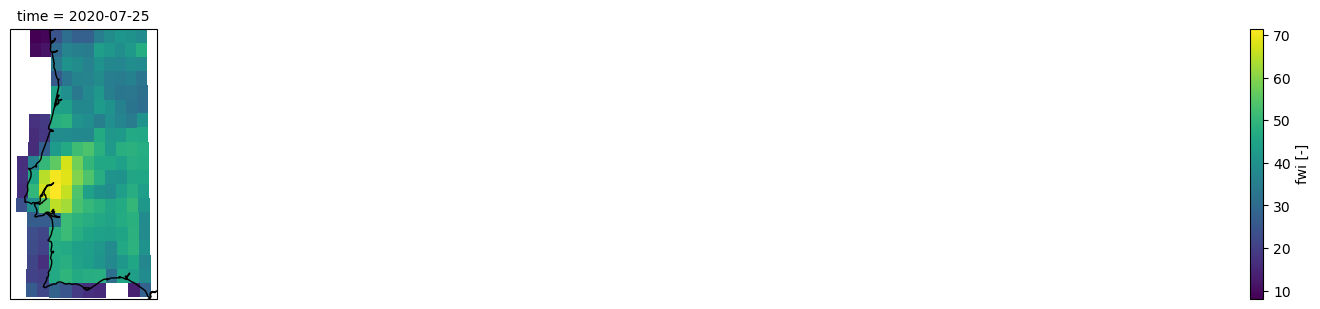

In [58]:
ds_e5_hr = ds_e5_hr.fwi
fwi_e5_hr = ds_e5_hr.loc[dict(lat = lat_slice, lon = lon_slice)]

map_proj = ccrs.LambertConformal(central_longitude = 352, central_latitude = 39.5)

# Plot RT-HR
p = fwi_e5_hr.plot(transform=ccrs.PlateCarree(),
                   col = 'time', col_wrap = 5,
                   subplot_kws = {'projection': map_proj})

for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent(bbox)
